# Analiza przykładowego zbioru danych z projektu [SpeakLeash](https://speakleash.org/)

*Powiązane repozytoria:*
- https://github.com/speakleash/speakleash
- https://github.com/speakleash/speakleash-postprocesor/blob/main/postprocessor/analyzer.py
- https://github.com/mglabska/speakleash_filters/blob/master/quality.py

### 1. Wybór zbioru i przygotowanie danych

Wybrany zbiór: *forum_parenting_pl_corpus*

[Dashboard - SpeakLeash.org](http://speakleash.org/en/dashboard-en/)

```ruby
import os
import pandas as pd
import pickle


from speakleash import Speakleash
PROJECT = input('Enter a dataset name: ')


def get_data(ds):
    lst1 = []
    for doc in ds:
        txt, meta = doc
        meta['text'] = txt
        lst1.append(meta)
    frame = pd.DataFrame(lst1)
    return frame


if __name__ == '__main__':
    base_dir = os.path.join(os.path.dirname(PROJECT))
    replicate_to = os.path.join(base_dir, PROJECT)
    sl = Speakleash(replicate_to)
    ds = sl.get(PROJECT).ext_data
    df = pd.DataFrame(get_data(ds))
    with open(f"datasets/{PROJECT}.pkl","wb") as f:
        pickle.dump(df, f)
```

[DataFrame](text_analysis.ipynb#DataFrame)

[Usuwanie duplikatów i pustych wierszy](text_analysis.ipynb#Duplikaty)

### 2. Generowanie wykresów

*******2.1. Rozkład cech — histogramy*******

```ruby
import os
import pandas as pd
import plotly.express as px

from speakleash import Speakleash

PROJECT = input('Enter a dataset name: ')


class Chart:
    def __init__(self, PROJECT):
        self.PROJECT = PROJECT
        base_dir = os.path.join(os.path.dirname(self.PROJECT))
        replicate_to = os.path.join(base_dir, self.PROJECT)
        sl = Speakleash(replicate_to)
        self.ds = sl.get(self.PROJECT).ext_data
        self.meta_frame = self.get_meta
        self.df_charts = self.get_data

    @property
    def get_meta(self):
        lst1 = []
        for doc in self.ds:
            txt, meta = doc
            meta['text'] = txt
            lst1.append(meta)
        meta_frame = pd.DataFrame(lst1)
        return meta_frame

    @property
    def get_data(self):
        df = self.meta_frame.copy()
        df = df.drop_duplicates(subset=['text'], ignore_index=True)
        cols = ['punctuations', 'symbols', 'stopwords', 'oovs', 'pos_num', 'pos_x', 'capitalized_words']
        for col in cols:
            df[f'{col}_ratio'] = df[col] / df['words']
        df_charts = df[[
            'avg_sentence_length',
            'avg_word_length',
            'verb_ratio',
            'noun_ratio',
            'punctuations_ratio',
            'symbols_ratio',
            'stopwords_ratio',
            'oovs_ratio',
            'lexical_density',
            'camel_case',
            'capitalized_words_ratio',
            'pos_x_ratio',
            'pos_num_ratio',
            'gunning_fog']]
        return df_charts


    def draw_charts(self):
        for i in self.df_charts.columns:
            fig = px.histogram(self.df_charts[i], title=i, labels=self.df_charts[i].values)
            fig.write_html(f"{self.PROJECT}_{i}_hist.html")


if __name__ == '__main__':
    charts = Chart(PROJECT)
    charts.draw_charts()
```


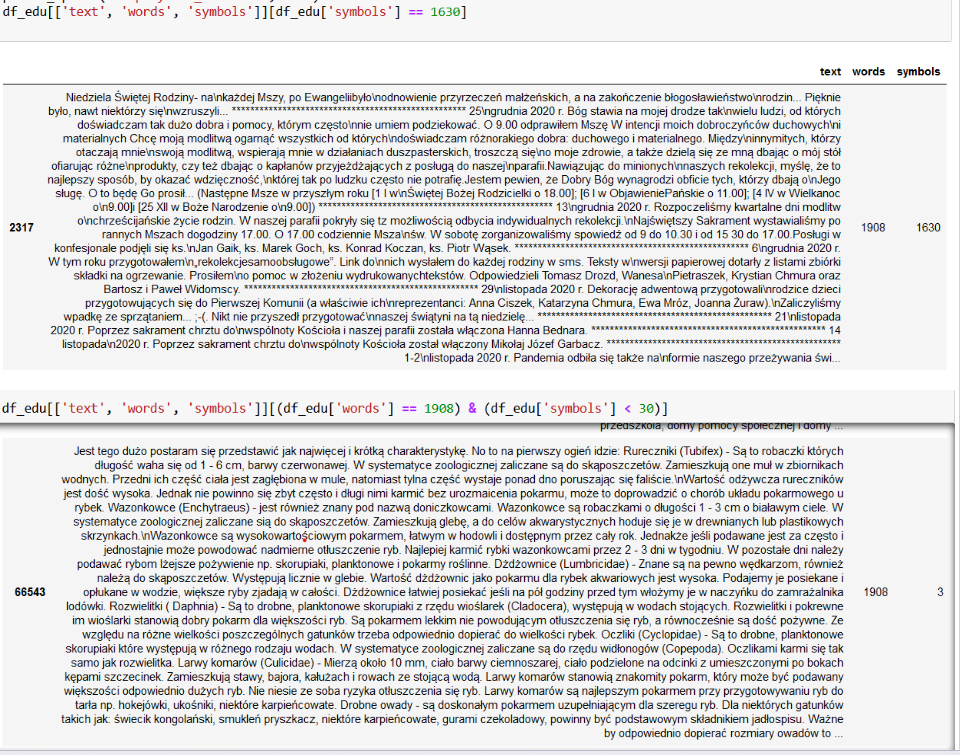


[śr. długość zdania](imgs/forum_parenting_pl_corpus_avg_sentence_length_hist.html)

[śr. długość słowa](imgs/forum_parenting_pl_corpus_avg_word_length_hist.html)

[liczba camelCase](imgs/forum_parenting_pl_corpus_camel_case_hist.html)

[odsetek słów pisanych wielką literą](imgs/forum_parenting_pl_corpus_capitalized_words_ratio_hist.html)

[gunning_fog_index](imgs/forum_parenting_pl_corpus_gunning_fog_hist.html)

[gęstość_leksykalna](imgs/forum_parenting_pl_corpus_lexical_density_hist.html)

[odsetek rzeczowników](imgs/forum_parenting_pl_corpus_noun_ratio_hist.html)

[odsetek słów spoza słownika](imgs/forum_parenting_pl_corpus_oovs_ratio_hist.html)

[odsetek liczebników](imgs/forum_parenting_pl_corpus_pos_num_ratio_hist.html)

[odsetek nieokreślonych części mowy](imgs/forum_parenting_pl_corpus_pos_x_ratio_hist.html)

[odsetek znaków interpunkcyjnych](imgs/forum_parenting_pl_corpus_punctuations_ratio_hist.html)

[odsetek stopwords](imgs/forum_parenting_pl_corpus_stopwords_ratio_hist.html)

[odsetek symboli](imgs/forum_parenting_pl_corpus_symbols_ratio_hist.html)

[odsetek casowników](imgs/forum_parenting_pl_corpus_verb_ratio_hist.html)

*******2.2. Analiza frekwencji słów*******

![WordCloud](wordcloud.jpg)

[Wykres słupkowy](imgs/freq_bar.html)

### 3. Model klasyfikacyjny — oznaczanie jakości językowej tekstów

*******3.1. Wybór cech do modelu*******

[Analiza wariancji](classification.ipynb#Wybór-cech-do-modelu)

[Wykres wariancji](imgs/var_bar.html)

[Macierz korelacji](imgs/corr_matrix.html)




*******3.2. SVC*******

[Trenowanie modelu](classification.ipynb#SVC)

*******3.3. RandomForestClassifier*******

[Trenowanie modelu](classification.ipynb#Random-Forest)

### 4. Co dalej?

1. Wykrywanie bardzo podobnych tekstów
([biblioteka gaoya](https://pypi.org/project/gaoya/))

2. Klasyfikacja - przykładowe usprawnienia
- Wektoryzacja słów (TfIdf, embeddingi:GloVe, transformatory)
- Użycie sieci neuronowej (RNN, z warstwą LSTM lub GRU)
- Użycie transformatorów

3. Analiza porównawcza z innymi tekstami ze zbioru SpeakLeash (np. artykułami, zbiorem gutenberg)

4. Wykrywanie pytań i odpowiedzi, szkodliwych treści.

5. …